# libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [8]:
!pip install wordcloud

In [9]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import string

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


In [7]:
import pandas as pd 
file_path = 'C:/Users/gurwi/ML all TASK/task 3 ml/training.1600000.processed.noemoticon.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path, encoding='ISO-8859-1')

In [8]:
df

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


# preprocessing

## Remove specified columns by name

In [11]:
# Remove specified columns by name
columns_to_remove = ['1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY', '_TheSpecialOne_']  # Column names to remove
df_cleaned = df.drop(columns=columns_to_remove)

# Optionally, reset the index for cleaner output
df_cleaned.reset_index(drop=True, inplace=True)

# Display the cleaned DataFrame
print(df_cleaned)

         0  \
0        0   
1        0   
2        0   
3        0   
4        0   
...     ..   
1599994  4   
1599995  4   
1599996  4   
1599997  4   
1599998  4   

        @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D  
0        is upset that he can't update his Facebook by ...                                                                   
1        @Kenichan I dived many times for the ball. Man...                                                                   
2          my whole body feels itchy and like its on fire                                                                    
3        @nationwideclass no, it's not behaving at all....                                                                   
4                            @Kwesidei not the whole crew                                                                    
...                                                    ...                 

In [20]:
df = df_cleaned
df

,0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew
...,...,...
1599994,4,Just woke up. Having no school is the best fee...
1599995,4,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,Happy 38th Birthday to my boo of alll time!!! ...


In [22]:
df.columns = ['labels', 'content']

In [24]:
df

,labels,content
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew
...,...,...
1599994,4,Just woke up. Having no school is the best fee...
1599995,4,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,Happy 38th Birthday to my boo of alll time!!! ...


In [26]:
df = df[['content', 'labels']]  # Reordering the columns
df

,content,labels
0,is upset that he can't update his Facebook by ...,0
1,@Kenichan I dived many times for the ball. Man...,0
2,my whole body feels itchy and like its on fire,0
3,"@nationwideclass no, it's not behaving at all....",0
4,@Kwesidei not the whole crew,0
...,...,...
1599994,Just woke up. Having no school is the best fee...,4
1599995,TheWDB.com - Very cool to hear old Walt interv...,4
1599996,Are you ready for your MoJo Makeover? Ask me f...,4
1599997,Happy 38th Birthday to my boo of alll time!!! ...,4


In [28]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df

,content,labels
0,@Nkluvr4eva My poor little dumpling In Holmde...,0
1,I'm off too bed. I gotta wake up hella early t...,0
2,I havent been able to listen to it yet My spe...,0
3,now remembers why solving a relatively big equ...,0
4,"Ate too much, feel sick",0
...,...,...
1599994,I didn't. The link was wrong,0
1599995,@tommcfly yes!! mcfly twitter profile is an ex...,4
1599996,@SarahFTW I know sometimes i just pretend i h...,0
1599997,Cant believe you came and asked me that...,0


In [30]:
df = df.head(10000)
df

,content,labels
0,@Nkluvr4eva My poor little dumpling In Holmde...,0
1,I'm off too bed. I gotta wake up hella early t...,0
2,I havent been able to listen to it yet My spe...,0
3,now remembers why solving a relatively big equ...,0
4,"Ate too much, feel sick",0
...,...,...
9995,@keisha_buchanan lol are u talking TV as in sc...,4
9996,@addieking you are SO welcome,4
9997,is snugglin with her little girl .. had a busy...,4
9998,@ladygagafan1 sad because I do not have the ne...,0


In [13]:
for i in df['labels']:
    print(i)

0
0
0
0
0
0
4
0
0
4
4
4
4
0
4
4
4
0
0
0
0
4
4
4
0
0
4
0
0
4
4
0
0
0
0
0
0
4
0
4
4
4
4
4
4
0
4
0
4
0
4
4
0
4
4
0
4
4
0
4
0
4
4
4
4
4
0
0
4
0
0
0
4
4
4
0
4
4
4
0
4
0
4
4
0
0
0
4
0
4
4
4
4
4
4
4
4
0
0
0
4
0
4
4
4
0
0
0
0
0
4
0
0
0
0
0
4
0
0
0
4
0
4
4
0
0
4
0
0
0
4
4
0
4
4
0
0
0
4
0
4
0
0
0
4
0
0
0
4
4
4
4
0
4
4
4
0
0
0
0
0
0
4
4
4
4
0
0
4
4
4
0
4
0
0
0
0
4
4
0
0
0
0
0
0
0
0
4
0
4
0
0
0
0
4
4
0
4
4
4
0
0
0
4
4
4
0
4
4
4
4
0
0
4
0
4
0
4
4
0
0
4
0
4
0
0
4
4
4
0
0
0
0
4
0
0
4
0
4
4
0
4
4
4
0
0
0
4
4
0
0
0
4
4
4
4
0
4
0
4
0
0
0
0
4
0
0
4
4
4
0
0
4
4
4
4
0
4
0
0
4
4
4
0
4
4
4
4
0
4
4
0
4
4
0
4
0
0
4
0
4
0
4
0
4
0
0
4
4
4
4
4
4
0
4
4
4
4
0
4
0
0
4
4
4
4
0
4
0
0
4
0
4
0
0
0
4
4
4
0
4
4
0
4
4
0
0
4
0
0
4
4
4
0
0
0
0
0
4
0
4
0
0
4
4
4
0
4
4
0
0
4
4
0
4
0
4
0
4
0
4
4
0
0
4
4
0
0
0
0
4
0
0
0
4
4
4
4
0
4
0
4
4
0
0
4
0
0
4
0
0
0
4
4
4
4
0
4
0
4
4
0
4
0
0
4
4
0
4
0
4
0
4
0
0
4
4
0
0
0
0
0
0
4
0
4
0
0
0
4
0
0
4
0
0
4
0
0
0
0
4
4
4
0
4
4
0
4
4
0
0
0
4
4
0
0
0
0
4
0
0
0
4
0
0
4
0
4
0
0
0
0
0
4
0
4
0
0
0
0


## 1. Lowercase

In [32]:

df['content'] = df['content'].str.lower()

C:\Users\gurwi\AppData\Local\Temp\ipykernel_5080\296585390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].str.lower()


## 2. Remove special characters and punctuation

In [34]:

df['content'] = df['content'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))

C:\Users\gurwi\AppData\Local\Temp\ipykernel_5080\2538460656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))


## 3. Tokenization

In [36]:

df['content'] = df['content'].apply(lambda x: x.split())

C:\Users\gurwi\AppData\Local\Temp\ipykernel_5080\1710805141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].apply(lambda x: x.split())


## 4. Remove stop words

In [40]:
import nltk

# Download the stopwords and tokenizer models
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gurwi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gurwi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [42]:

stop_words = set(stopwords.words('english'))
df['content'] = df['content'].apply(lambda x: [word for word in x if word not in stop_words])


C:\Users\gurwi\AppData\Local\Temp\ipykernel_5080\1080452886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].apply(lambda x: [word for word in x if word not in stop_words])


In [44]:
df

,content,labels
0,"[nkluvreva, poor, little, dumpling, holmdel, v...",0
1,"[im, bed, gotta, wake, hella, early, tomorrow,...",0
2,"[havent, able, listen, yet, speakers, busted]",0
3,"[remembers, solving, relatively, big, equation...",0
4,"[ate, much, feel, sick]",0
...,...,...
9995,"[keishabuchanan, lol, u, talking, tv, screen, ...",4
9996,"[addieking, welcome]",4
9997,"[snugglin, little, girl, busy, weekend, painti...",4
9998,"[ladygagafan, sad, new, album, jonas]",0


## Join tokens back to string

In [46]:

df['content'] = df['content'].apply(lambda x: ' '.join(x))

C:\Users\gurwi\AppData\Local\Temp\ipykernel_5080\1794645254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].apply(lambda x: ' '.join(x))


In [48]:
df

,content,labels
0,nkluvreva poor little dumpling holmdel vids re...,0
1,im bed gotta wake hella early tomorrow morning,0
2,havent able listen yet speakers busted,0
3,remembers solving relatively big equation two ...,0
4,ate much feel sick,0
...,...,...
9995,keishabuchanan lol u talking tv screen picture...,4
9996,addieking welcome,4
9997,snugglin little girl busy weekend painting amp...,4
9998,ladygagafan sad new album jonas,0


# Exploration

In [50]:
sns.set(style="whitegrid")

In [52]:
df.describe()

,labels
count,10000.000000
mean,1.998400
std,2.000099
min,0.000000
25%,0.000000
50%,0.000000
75%,4.000000
max,4.000000


## Count of each label

C:\Users\gurwi\AppData\Local\Temp\ipykernel_5080\4095581490.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='labels', data=df, palette='viridis')


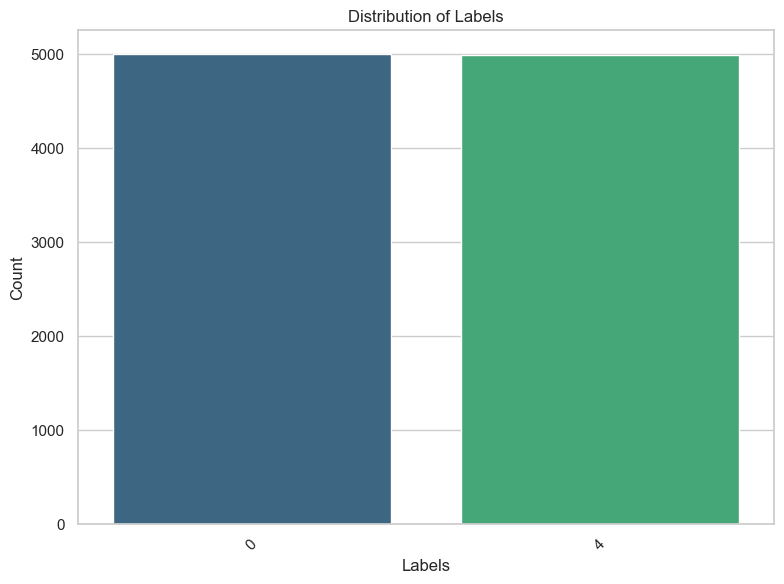

In [54]:

plt.figure(figsize=(8, 6))
sns.countplot(x='labels', data=df, palette='viridis')
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

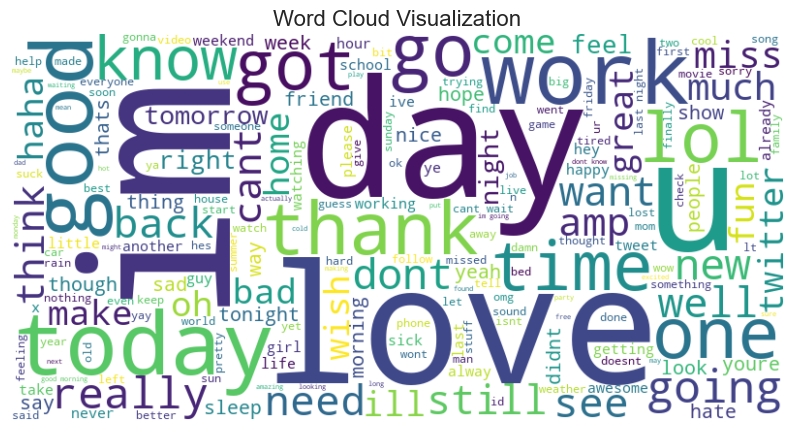

In [26]:
text_data = " ".join(content for content in df['content'])

# Clean the text: remove punctuation, convert to lowercase, and remove stopwords
stop_words = set(stopwords.words('english'))
translator = str.maketrans('', '', string.punctuation)

cleaned_text = " ".join(
    word for word in text_data.translate(translator).lower().split()
    if word not in stop_words
)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(cleaned_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud Visualization", fontsize=16)
plt.show()

## Length of tweets (content) distribution

C:\Users\gurwi\AppData\Local\Temp\ipykernel_5080\3504213689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content_length'] = df['content'].apply(len)


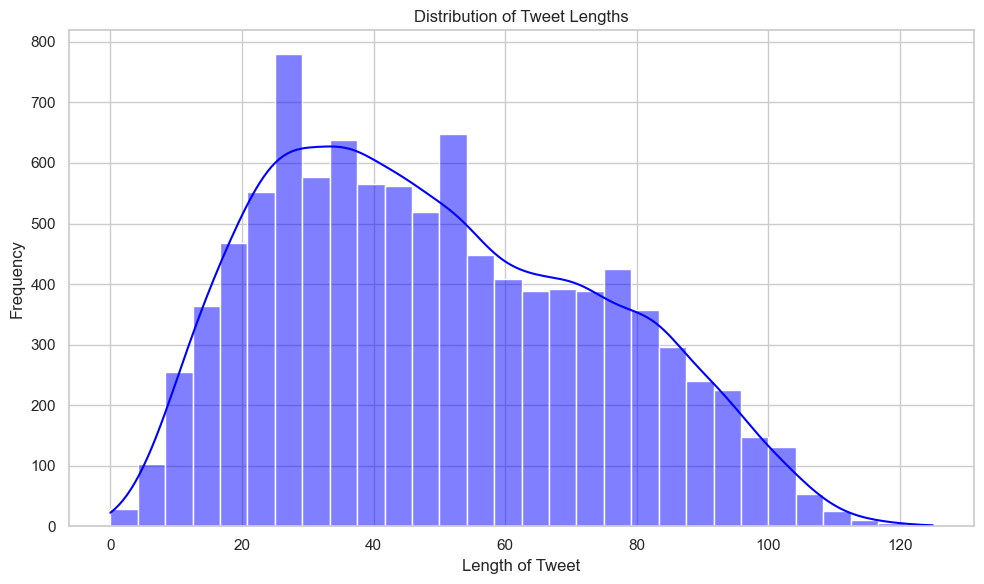

In [56]:

df['content_length'] = df['content'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['content_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Length of Tweet')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Visualizing the average length of tweets per label

C:\Users\gurwi\AppData\Local\Temp\ipykernel_5080\1584697626.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='labels', y='content_length', data=df, palette='Set2')


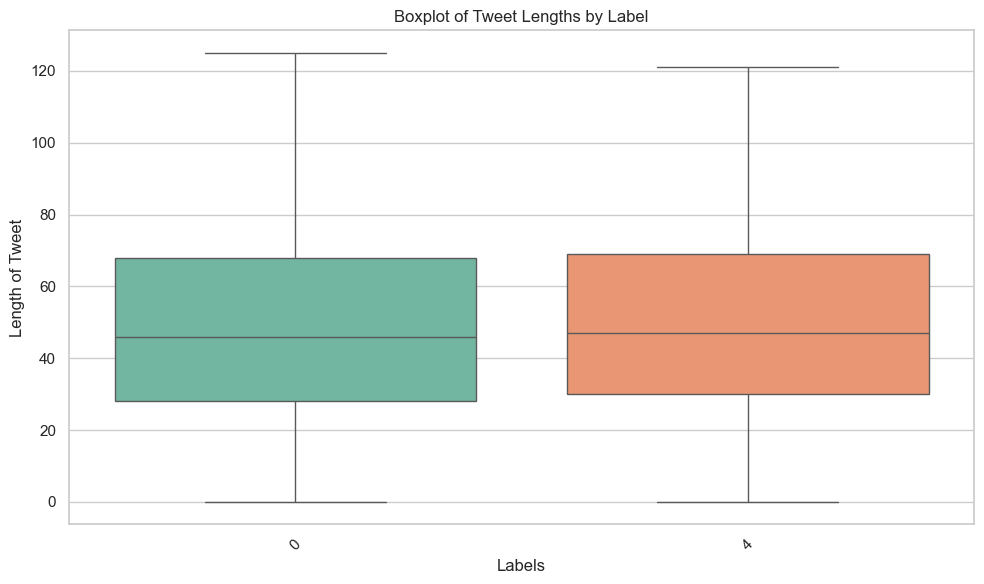

In [58]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='labels', y='content_length', data=df, palette='Set2')
plt.title('Boxplot of Tweet Lengths by Label')
plt.xlabel('Labels')
plt.ylabel('Length of Tweet')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Exploring the presence of unique words

C:\Users\gurwi\AppData\Local\Temp\ipykernel_5080\1400134527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unique_words'] = df['content'].apply(lambda x: len(set(x.split())))


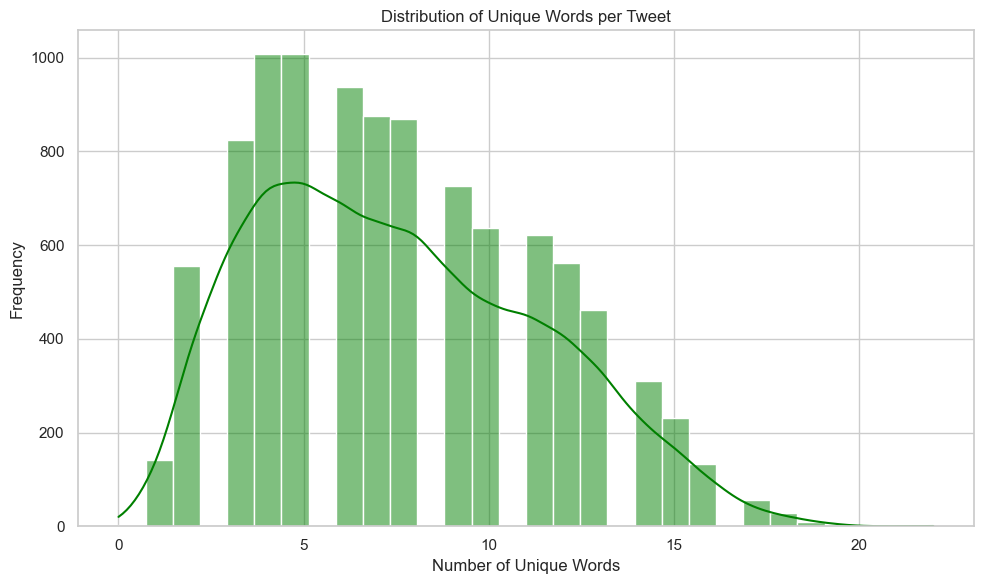

In [60]:

df['unique_words'] = df['content'].apply(lambda x: len(set(x.split())))

plt.figure(figsize=(10, 6))
sns.histplot(df['unique_words'], bins=30, kde=True, color='green')
plt.title('Distribution of Unique Words per Tweet')
plt.xlabel('Number of Unique Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Visualizing the top 20 most common words (excluding stopwords)

C:\Users\gurwi\AppData\Local\Temp\ipykernel_5080\195779599.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=common_words_df, palette='Blues')


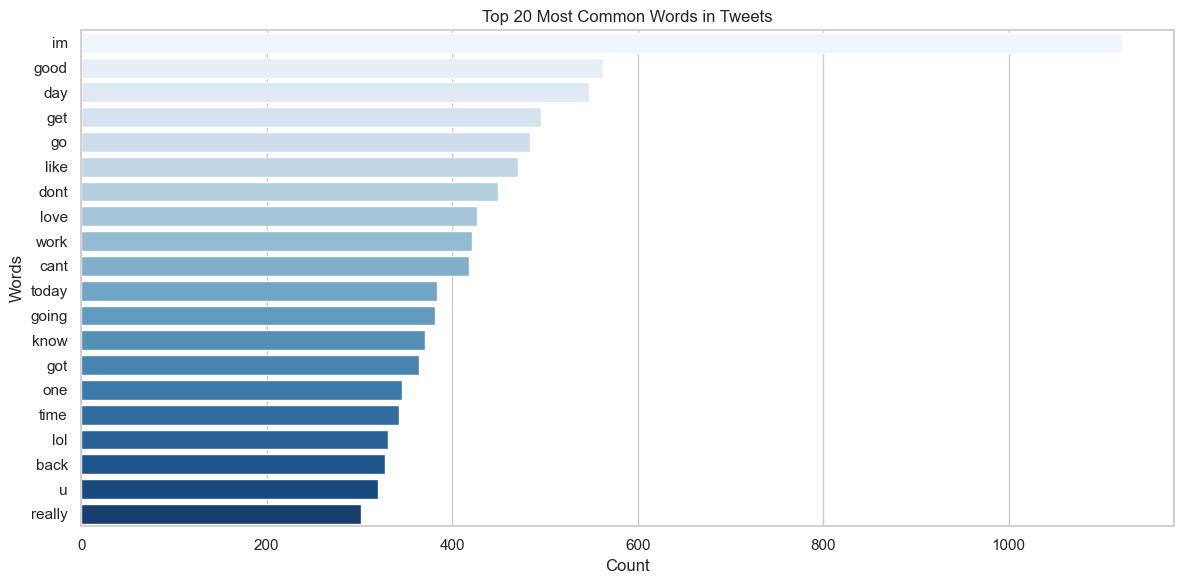

In [64]:

all_words = ' '.join(df['content']).split()
common_words = Counter(all_words)
common_words_df = pd.DataFrame(common_words.most_common(20), columns=['word', 'count'])

plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='word', data=common_words_df, palette='Blues')
plt.title('Top 20 Most Common Words in Tweets')
plt.xlabel('Count')
plt.ylabel('Words')
plt.tight_layout()
plt.show()

# Models

In [78]:
X = df['content']
y = df['labels']

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Vectorize the Text Data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

## Logistic Regression

Logistic Regression:
              precision    recall  f1-score   support

           0       0.72      0.71      0.71       980
           4       0.72      0.73      0.73      1020

    accuracy                           0.72      2000
   macro avg       0.72      0.72      0.72      2000
weighted avg       0.72      0.72      0.72      2000



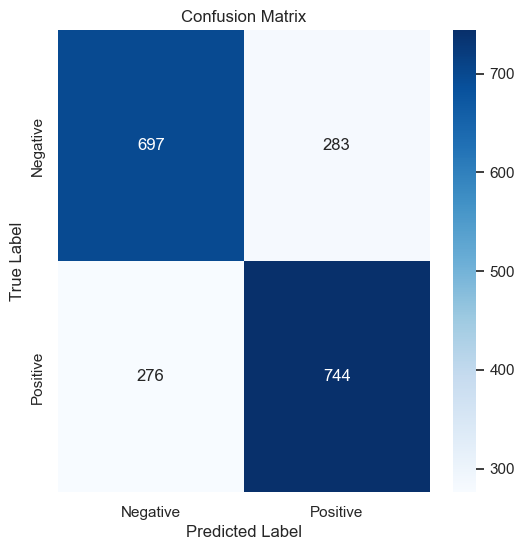

In [68]:

print("Logistic Regression:")
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_vectorized, y_train)
y_pred_logreg = logreg.predict(X_test_vectorized)
print(classification_report(y_test, y_pred_logreg))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Naive Bayes

Naive Bayes:
              precision    recall  f1-score   support

           0       0.68      0.78      0.73       980
           4       0.76      0.65      0.70      1020

    accuracy                           0.72      2000
   macro avg       0.72      0.72      0.72      2000
weighted avg       0.72      0.72      0.72      2000

              precision    recall  f1-score   support

           0       0.68      0.78      0.73       980
           4       0.76      0.65      0.70      1020

    accuracy                           0.72      2000
   macro avg       0.72      0.72      0.72      2000
weighted avg       0.72      0.72      0.72      2000



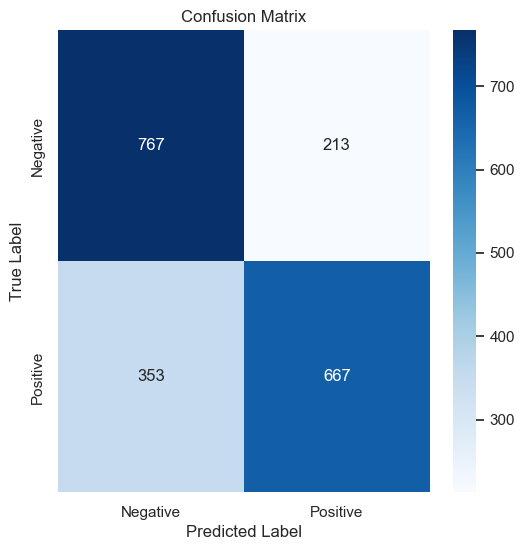

In [70]:

print("Naive Bayes:")
nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized, y_train)
y_pred_nb = nb_model.predict(X_test_vectorized)
print(classification_report(y_test, y_pred_nb))

# Print classification report
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Support Vector Machine

In [72]:

print("Support Vector Machine:")
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_vectorized, y_train)
y_pred_svm = svm_model.predict(X_test_vectorized)
print(classification_report(y_test, y_pred_svm))

Support Vector Machine:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       980
           4       0.72      0.70      0.71      1020

    accuracy                           0.71      2000
   macro avg       0.71      0.71      0.71      2000
weighted avg       0.71      0.71      0.71      2000



## Random Forest

Random Forest:
              precision    recall  f1-score   support

           0       0.68      0.75      0.71       980
           4       0.73      0.66      0.69      1020

    accuracy                           0.70      2000
   macro avg       0.70      0.70      0.70      2000
weighted avg       0.71      0.70      0.70      2000

              precision    recall  f1-score   support

           0       0.70      0.72      0.71       980
           4       0.72      0.70      0.71      1020

    accuracy                           0.71      2000
   macro avg       0.71      0.71      0.71      2000
weighted avg       0.71      0.71      0.71      2000



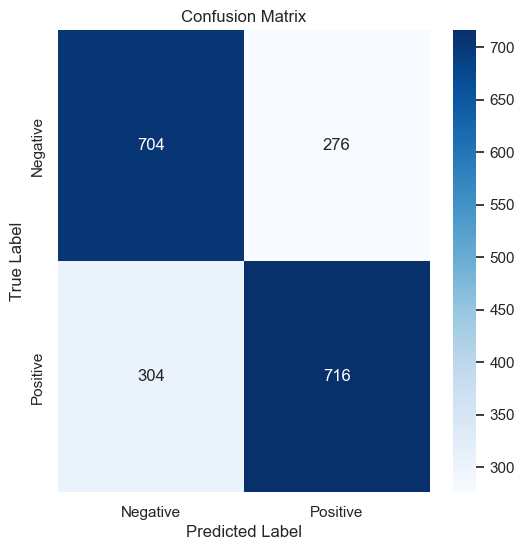

In [73]:

print("Random Forest:")
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_vectorized, y_train)
y_pred_rf = rf_model.predict(X_test_vectorized)
print(classification_report(y_test, y_pred_rf))

# Print classification report
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Gradient Boosting Classifier

Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.75      0.54      0.63       980
           4       0.65      0.83      0.73      1020

    accuracy                           0.69      2000
   macro avg       0.70      0.68      0.68      2000
weighted avg       0.70      0.69      0.68      2000



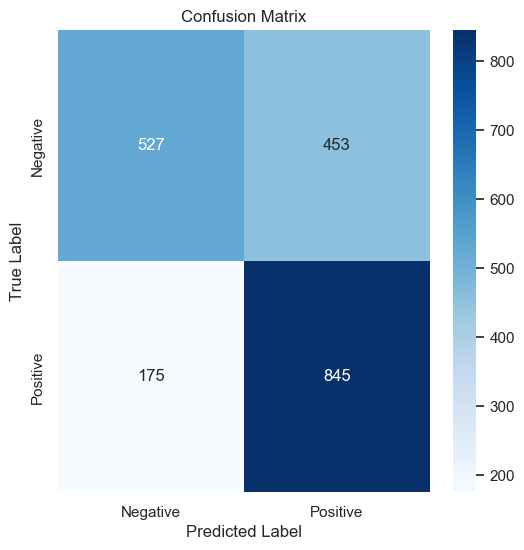

In [74]:

print("Gradient Boosting Classifier:")
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_vectorized, y_train)
y_pred_gb = gb_model.predict(X_test_vectorized)
print(classification_report(y_test, y_pred_gb))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()